In [10]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [11]:
! pip install keras

In [12]:
! pip install keras.optimizer

ERROR: Could not find a version that satisfies the requirement keras.optimizer (from versions: none)
ERROR: No matching distribution found for keras.optimizer


In [13]:
# about dataset
X, y = datasets.make_moons(n_samples = 1000, noise = 0.1, random_state = 0)
y.shape, X.shape

((1000,), (1000, 2))

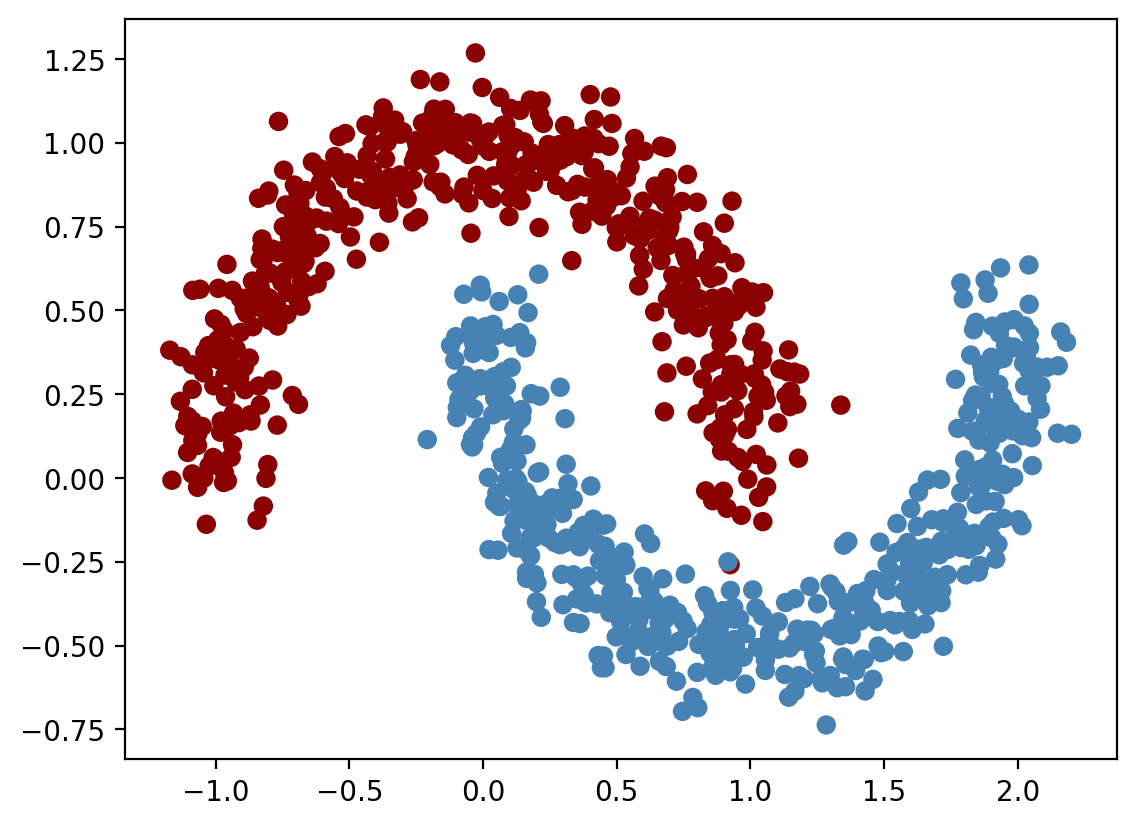

In [14]:
# visualize
colors = ["Steelblue" if label == 1 else "darkred" for label in y]
plt.scatter(X[:, 0], X[:, 1], color = colors)

### Setting up our network

Recall the structure of our example network from the previous notebook, where  sl  represents a layer of neurons in the network:

+ s1=2  (two input features, not counting one bias unit)
- s2=5  (five hidden units, not counting one bias unit)
+ s3=5  (five hidden units, not counting one bias unit)
- s4=2  (two output classes)

In [15]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(5, activation = 'relu', input_shape = (2, )))
# Add one hidden layer 
model.add(Dense(5, activation = 'relu'))
# Add an output layer 
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

### Defining the optimizer

In Keras, you must also specify an optimizer to use when training your model.  Our data set wasn't particularly large so this was a feasible option, however in practice stochastic gradient descent is used. This is when the model is trained on smaller, random batches of the training set. This is also usually coupled with a smaller learning rate. Here we will define a stochastic gradient descent optimizer with a learning rate of 0.01 ( α , which we set to 0.5 in our previous example), which should behave similarly. In Keras, a stochastic gradient descent optimizer object is SGD.

In [16]:
sgd = SGD(learning_rate=0.1)

### Loss function

Finally we must choose a loss function and "compile" our model. We will use a cross-entropy loss function.

In [17]:
model.compile(loss = 'binary_crossentrophy', optimizer = sgd, metrics = ['accuracy'])

### Training the model

We can now train our model using the model.fit() method. Usually this method prints a nice text-based indicator of the training progress. We'll turn this off (verbose=0) since we're going to use a large number of iterations (nb_epoch=4000, greater than our last example due to the smaller  α ). We can also easily capture information about the training process in the History object returned by model.fit(). For good measure we'll also pass the shuffle=True so that our training data batches are shuffled before each pass.

In [27]:
history = model.fit(X[:500],y[:500], verbose=1, nb_epoch=4000, shuffle=True)

TypeError: Model.fit() got an unexpected keyword argument 'nb_epoch'